In [ ]:
%matplotlib inline

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import linear_model, datasets
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

# Import Keras libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical


##### Tensorflow GPU ##########
###### Tensorflow-GPU ########
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if physical_devices:  # Check if the list is not empty
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
else:
    print("No GPU devices found.")

import re

/Users/pascal-maker/pascalworkspace/env/lib/python3.10/site-packages/jax/_src/lib/__init__.py:32: UserWarning: JAX on Mac ARM machines is experimental and minimally tested. Please see https://github.com/google/jax/issues/5501 in the event of problems.
  warnings.warn("JAX on Mac ARM machines is experimental and minimally tested. "


IndexError: list index out of range

In [2]:
dataset = pd.read_csv('employees.csv')
dataset.head()

,job_satisfaction,age,in_service
0,7.3,24,1
1,6.8,53,1
2,5.9,31,0
3,8.8,31,1
4,5.6,20,0


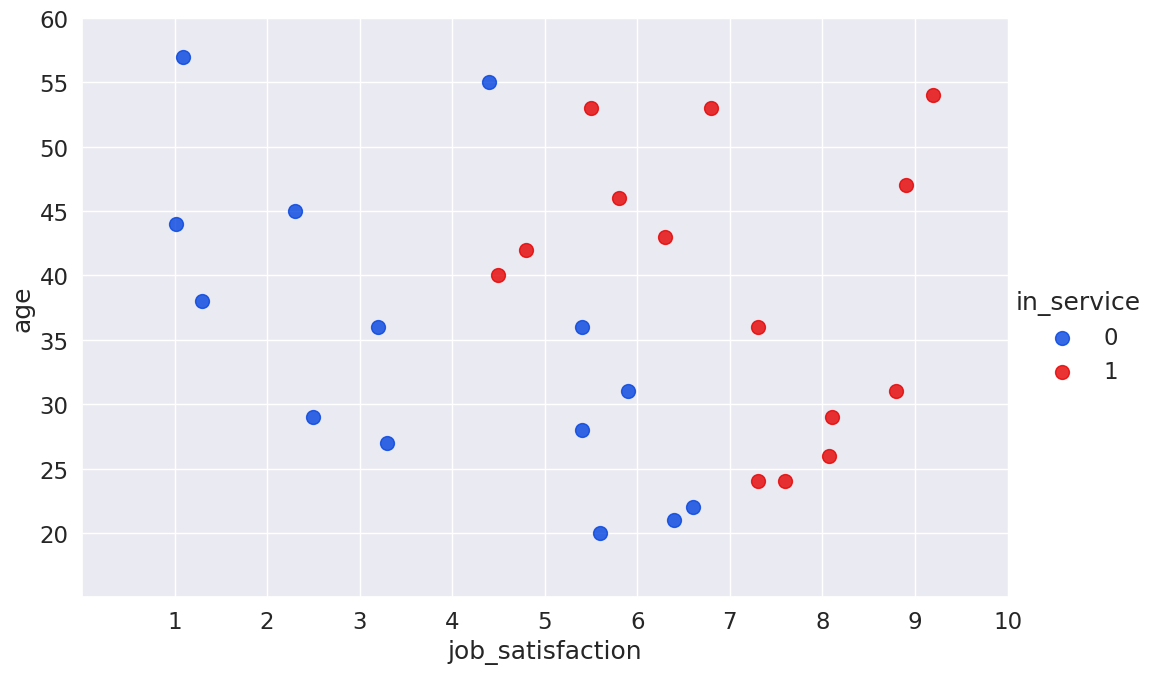

In [3]:
sns.set(font_scale = 1.5) # font size of the axis labels
colors = ['blue', 'red', 'greyish', 'faded green', 'dusty purple']
g = sns.lmplot(x='job_satisfaction',y='age',data=dataset,fit_reg=False,hue='in_service',palette =sns.xkcd_palette(colors),
           scatter_kws={'s':100}, height=7, aspect=1.5)
g.set(xlim=(0, 10), ylim=(15, 60),xticks=[1, 2,3,4,5,6,7,8,9,10], yticks=[20, 25, 30,35,40,45,50,55,60 ])


In [4]:
y = dataset.in_service.values
X = dataset.drop(['in_service'],axis=1)


In [5]:
logreg = linear_model.LogisticRegression(C=1e5) # C= Inverse of regularization strength;                                                # must be a positive float. Like in support vector machines,
                                                # smaller values specify stronger regularization.
logreg.fit(X, y)

print('coefficiënten: ',logreg.coef_)
print('intercept:',logreg.intercept_)

coefficiënten:  [[2.15872616 0.20303943]]
intercept: [-19.51126249]


/home/mcldwitt/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Figure size 1600x900 with 0 Axes>

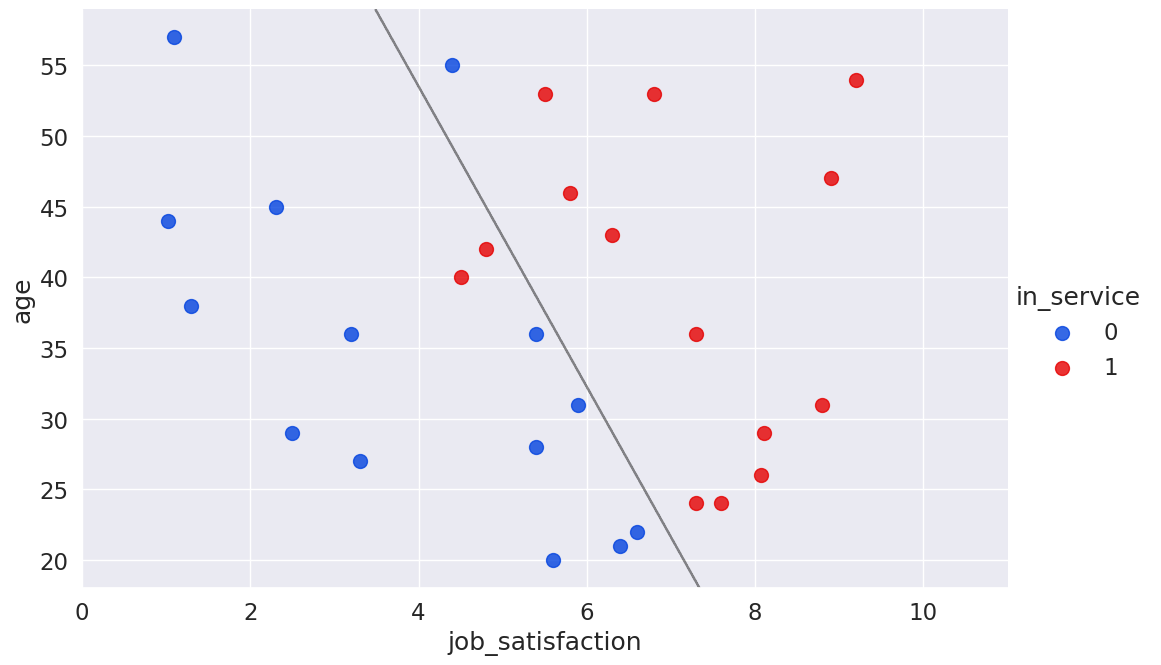

In [6]:
fig = plt.figure(figsize=(16,9))

X = np.asarray(X)

h = 0.01
job_satisfaction_min = X[:,0].min()-2
job_satisfaction_max = X[:,0].max()+2
age_min = X[:,1].min()-2
age_max = X[:,1].max()+2
xx, yy = np.meshgrid(np.arange(job_satisfaction_min, job_satisfaction_max, h),np.arange(age_min, age_max, h))

xy = np.vstack([xx.ravel(), yy.ravel()]).T
Z = logreg.predict(xy).reshape(xx.shape)

sns.set(font_scale = 1.5)
colors = ['blue', 'red', 'greyish', 'faded green', 'dusty purple']
sns.lmplot(x='job_satisfaction',y='age',data=dataset,fit_reg=False,hue='in_service',palette =sns.xkcd_palette(colors),scatter_kws={'s':100}, height=7, aspect=1.5)
#plt.ylim(0, 11)
plt.xlim(0, 11)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5)


## Higher order features

In [7]:
# creation of higher order features
degree=3

poly = PolynomialFeatures(degree)
Xp = poly.fit_transform(X)

# Train model 

logreg_poly = linear_model.LogisticRegression(C=1)
logreg_poly.fit(Xp, y)

/home/mcldwitt/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1)

/home/mcldwitt/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Figure size 1600x900 with 0 Axes>

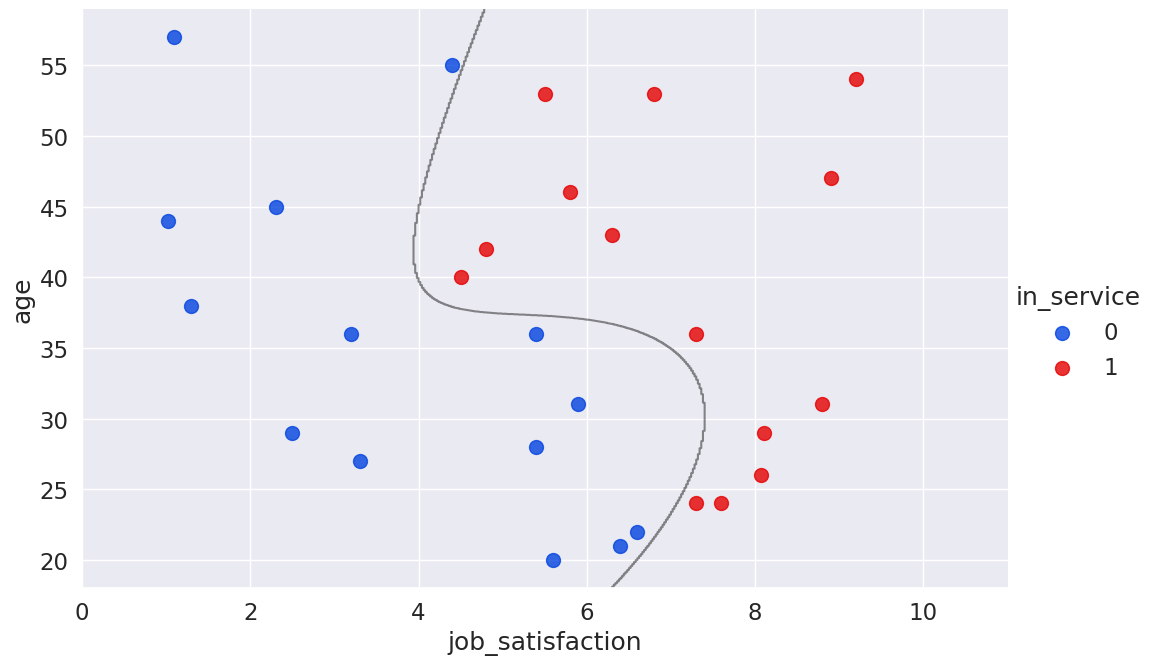

In [8]:
fig = plt.figure(figsize=(16,9))

Xp = np.asarray(X)

h = 0.02
job_satisfaction_min = Xp[:,0].min()-2
job_satisfaction_max = Xp[:,0].max()+2
age_min = Xp[:,1].min()-2
age_max = Xp[:,1].max()+2
xx, yy = np.meshgrid(np.arange(job_satisfaction_min, job_satisfaction_max, h),np.arange(age_min, age_max, h))

xy = np.vstack([xx.ravel(), yy.ravel()]).T

xy_p = poly.fit_transform(xy)


Z = logreg_poly.predict(xy_p).reshape(xx.shape)


sns.set(font_scale = 1.5)
colors = ['blue', 'red', 'greyish', 'faded green', 'dusty purple']
sns.lmplot(x='job_satisfaction',y='age',data=dataset,fit_reg=False,hue='in_service',palette =sns.xkcd_palette(colors),scatter_kws={'s':100}, height=7, aspect=1.5)
plt.xlim(0, 11)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5)



Z = logreg.predict(xy)


## Neural network

In [9]:
# data normalization via standard scaler

scaler = StandardScaler()

scaler.fit(X)
Xs = scaler.transform(X)

In [ ]:
# Initialize the neural network

# Define the input dimension based on the number of features in the dataset
input_dim = Xs.shape[1]

# Create a Sequential model
model = Sequential()

# Add the first hidden layer
# - 5 neurons
# - Input dimension is the number of features in the dataset
# - Weight initializer: RandomUniform
# - Activation function: tanh
model.add(Dense(5, input_dim=input_dim, kernel_initializer='RandomUniform', activation='tanh'))

# Add the second hidden layer
# - 5 neurons
# - Weight initializer: RandomUniform
# - Activation function: tanh
model.add(Dense(5, kernel_initializer='RandomUniform', activation='tanh'))

# Add the third hidden layer
# - 5 neurons
# - Weight initializer: RandomUniform
# - Activation function: tanh
model.add(Dense(5, kernel_initializer='RandomUniform', activation='tanh'))

# Add the output layer
# - 1 neuron for binary classification
model.add(Dense(1))

# Apply sigmoid activation to the output layer for binary classification
model.add(Activation('sigmoid'))

# Define the optimizer
# - Adam optimizer with a learning rate of 0.05
adam = tf.keras.optimizers.Adam(learning_rate=0.05)

# Compile the model
# - Loss function: Binary cross-entropy for binary classification
# - Optimizer: Adam optimizer
# - Metrics: Accuracy to evaluate model performance
model.compile(loss=tf.keras.losses.binary_crossentropy, optimizer=adam, metrics=['accuracy'])

# Train the model
# - Training data: Xs (features) and y (labels)
# - Epochs: Train for 300 epochs
# - Verbose: 1 (displays training progress)
# - Validation split: 0.0 (no validation data used)
history = model.fit(Xs, y, epochs=300, verbose=1, validation_split=0.0)

/home/mcldwitt/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1758873011.715856    7081 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1758873011.715959    7081 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1758873011.716005    7081 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1758873012.571393    7081 cuda_executor.cc:1001] cou

Epoch 1/300


I0000 00:00:1758873014.344472    7177 service.cc:146] XLA service 0x7f5b1000cb30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1758873014.344506    7177 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6071 - loss: 0.6931
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8929 - loss: 0.6918
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5000 - loss: 0.6869
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8214 - loss: 0.6626
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6429 - loss: 0.6248
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8214 - loss: 0.5538
Epoch 7/300


I0000 00:00:1758873015.493999    7177 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8571 - loss: 0.4735
Epoch 8/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8929 - loss: 0.3865
Epoch 9/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9286 - loss: 0.3097
Epoch 10/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8929 - loss: 0.2664
Epoch 11/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8929 - loss: 0.2598
Epoch 12/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9286 - loss: 0.2670
Epoch 13/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9286 - loss: 0.2798
Epoch 14/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8929 - loss: 0.2958
Epoch 15/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8929 - loss: 0.3088
Epoch 16/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9286 - loss: 0.3114
Epoch 17/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9286 - loss: 0.3137
Epoch 18/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9286 - loss: 0.

In [11]:
y_pred = (model.predict(Xs) > 0.5).astype('int32')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


156057/156057 ━━━━━━━━━━━━━━━━━━━━ 282s 2ms/step


<Figure size 1600x900 with 0 Axes>

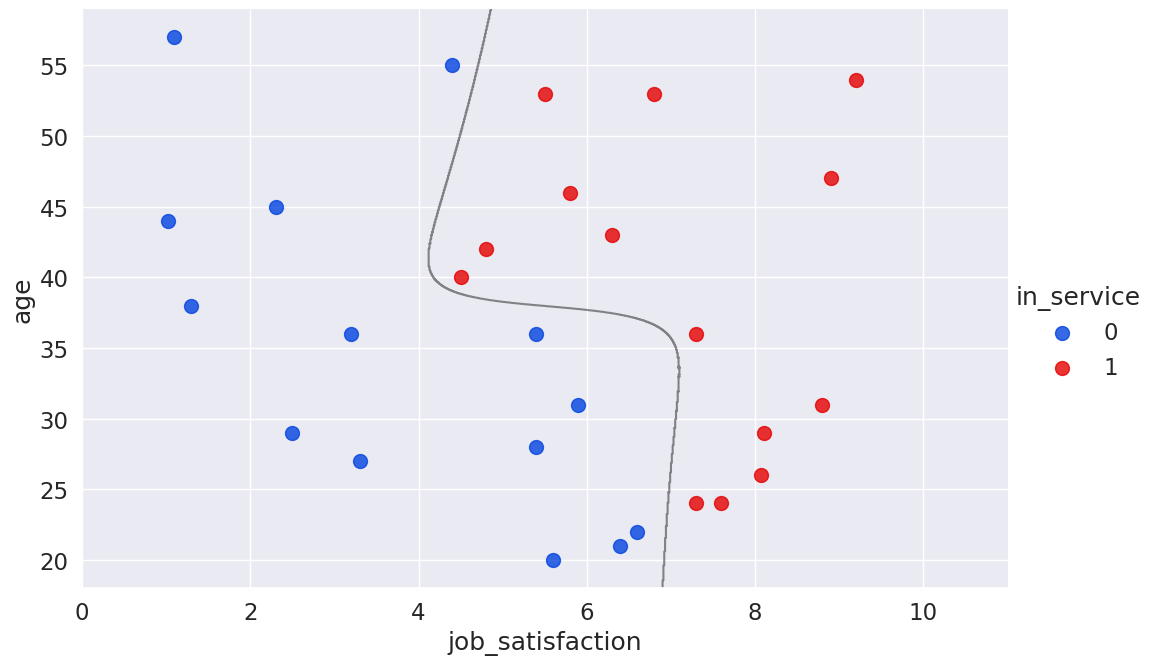

In [ ]:
# Create a figure with a specified size
fig = plt.figure(figsize=(16, 9))

# Convert the input data `X` to a NumPy array (if not already)
X = np.asarray(X)

# Define the step size for the mesh grid
h = 0.01

# Define the range for the first feature (job satisfaction) with some padding
job_satisfaction_min = X[:, 0].min() - 2
job_satisfaction_max = X[:, 0].max() + 2

# Define the range for the second feature (age) with some padding
age_min = X[:, 1].min() - 2
age_max = X[:, 1].max() + 2

# Create a mesh grid for the feature space
xx, yy = np.meshgrid(
    np.arange(job_satisfaction_min, job_satisfaction_max, h),
    np.arange(age_min, age_max, h)
)

# Flatten the mesh grid and stack the coordinates into a 2D array
xy = np.vstack([xx.ravel(), yy.ravel()]).T

# Scale the feature space using the same scaler used for training
xys = scaler.transform(xy)

# Predict the class probabilities for the grid points
# Convert probabilities to binary predictions (1 if > 0.5, else 0)
# Reshape the predictions to match the shape of the mesh grid
Zn = (model.predict(xys) > 0.5).astype('int32').reshape(xx.shape)

# Set the font scale for Seaborn plots
sns.set(font_scale=1.5)

# Define a color palette for the plot
colors = ['blue', 'red', 'greyish', 'faded green', 'dusty purple']

# Create a scatter plot of the dataset
# - x-axis: job satisfaction
# - y-axis: age
# - hue: in_service (class labels)
# - palette: custom color palette
# - scatter_kws: size of the scatter points
sns.lmplot(
    x='job_satisfaction',
    y='age',
    data=dataset,
    fit_reg=False,
    hue='in_service',
    palette=sns.xkcd_palette(colors),
    scatter_kws={'s': 100},
    height=7,
    aspect=1.5
)

# Set the x-axis limits for the plot
plt.xlim(0, 11)

# Add decision boundary contours to the plot
# - Contours are drawn based on the predictions (`Zn`) over the mesh grid
# - `levels=[-1, 0, 1]` specifies the contour levels
# - `alpha=0.5` sets the transparency of the contours
plt.contour(xx, yy, Zn, colors='k', levels=[-1, 0, 1], alpha=0.5)